<a href="https://colab.research.google.com/github/ElenaBara21/TensorFlow/blob/main/02_neural_network_classification_in_tensorfloew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification

**Binary classification** - 2 things - spam not spam

**Multiclass classification** - more than 2 things(one photo - sushi, one photo stake etc)

**Multilabel classification** - multiple label per sample(one article three labels - machine learning, Artificial intellegence, etc)

# Classification inputs and outputs

we know input -> Machine learning -> we know output

gets represented as a tensor
[batch_size, width, height, colour_channels]

shape = [None, 224, 224, 3]
shape = [32, 224, 224, 3]
*32 is a very common batch size

this shapes vary on your classification problem you're working on

# (typical) Archetecture of a classification model(we're going to be building lots of these)
Classification is where you try to classify something as one thing or another:
a few types:
* Binary
* Multiclass classification
* Multilabel classification


table from tensor flow or page295 below explanation


In [1]:
#1. Create a model (specified to your problem) - Input layer shape:
# tf.keras.Input(shape=224,224,3)),# same as number of features(age, sex, height, weight, smoking status)
# tf.keras.layers.Dense(100, activation="relu"),# where hidden layers problem specific generally 10 to 100 unlimited
# #above 100 means neurons per hidden layer
# tf.keras.layers.Dense(3, activation="softmax")# 3 is output layer shape 1 one class(3 for food, person or a dog photo), 1 per class in multiclass
#activation = relu - hidden activation usually RELurecltified linear unit
#loss function cross entropy(tf.keras.losses.BinaryCrossentropy in ->
#->tensorflow)
#Optimizer = SGD(stochastic gradient descent), Adam
#])

In [2]:
## Creating data to view and fit
from sklearn.datasets import make_circles

n_samples = 1000
#make 1000 examples
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out feautures
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is difficult to understand right now ... lets visualize it!


In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


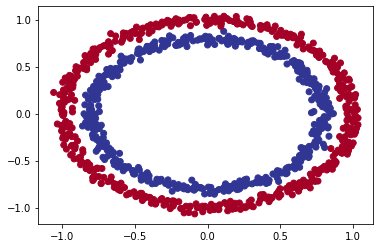

In [6]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
#Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#How to check how many samples we're working
len(X), len(y)


(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]


(array([0.75424625, 0.23148074]), 1)

## Steps in modelling with Tensor Flow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [10]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
# Lets try and improve for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem our model is getting around - 50% accuracy its performing as if its guessing.

So lets step things up a notch and add an extra layer.

In [13]:
#Set the random seed 
tf.random.set_seed=42

# 1. Create the model using the Sequential API
tf.keras.layers.Dense(1),
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),

])

#2. Compile the model 
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
#4.Evaluate the model
model_2.evaluate(X, y)


32/32 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving our model

Lets look into our bag of tricks to see how we can improve our model

1. Create a model we might more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization function such as Adam or SGD
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer

In [16]:
#Set the random seed 
tf.random.set_seed=42

# 1. Create the model using the Sequential API

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), #add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

#2. Compile the model 
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)



In [17]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.7019 - accuracy: 0.5100


[0.7019345760345459, 0.5099999904632568]

#To vizualise our model predictions lets create a function "plot decision boundary()" this functon will:
 * take in a trained model features(X) and labels(y)
 * Create a meshgrid of the different X values
 * Make predictions around the meshgrid
 * Plot the predictions as well as a line between zones (where each unique class  falls)

In [18]:
import numpy as np

In [19]:

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np. meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
  # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


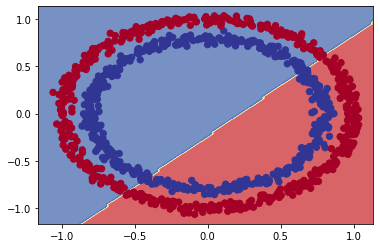

In [20]:
plot_decision_boundary(model_3, X, y)

In [21]:
# Lets see if our model can be used for a regression problem...

tf.random.set_seed=42

#Create some regression
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression problem


In [22]:
# Set random seed
tf.random.set_seed=42
 
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

In [23]:
# Set random seed
tf.random.set_seed=42
 
# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)
 
# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
 
# Fit our model to the data
 
## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+
 
## After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 4ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 7288.2886 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 6ms/step 

NameError: ignored

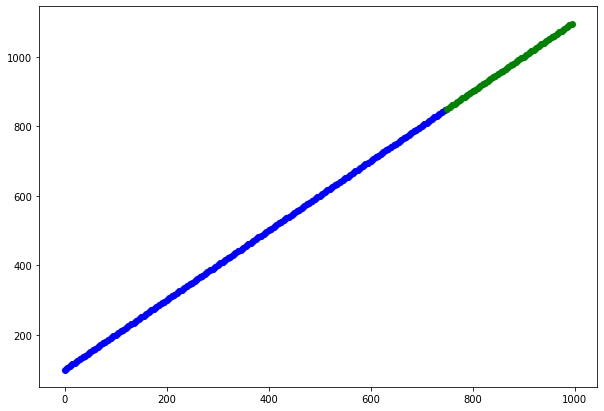

In [24]:
#Make predictions our trained model
#y_reg_preds = model_3.predict(y_reg_test)

#Plot the model's predictions agains our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend(); 


In [31]:
# Set the random seed
tf.random.set_seed=42

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.3348 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2088 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0679 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0231 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9643 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8197 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7306 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6669 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5537 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4729 - accuracy: 0.4840
Epoch 11/100
32/32 [=

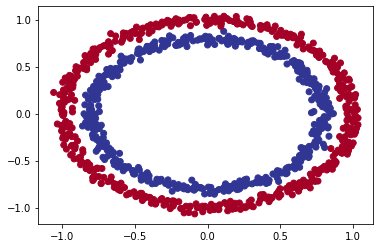

In [28]:
# check out our data
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classifcation...


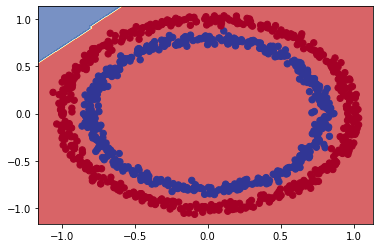

In [32]:
#Check th edecision boundary for our latest model
plot_decision_boundary(model=model_4, 
                       X=X, 
                       y=y)

Lets try our first neural network with a non-linear activation function

In [33]:
# Set  random seed
tf.random.set_seed=42

#1. Create a modela non linear
model_5=tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
#2.Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3.Fit the model
history = model_5.fit(X, y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 6.2922 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2691 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2439 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2400 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2384 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2366 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2263 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2232 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2210 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2196 - accuracy: 0.4880
Epoch 11/100
32/32 [=

In [37]:
# time to replicate the multi-layer neural network from TensorFlow playgroup
tf.random.set_seed=42

#Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1)
])
#Compile the model
model_6.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history = model_6.fit(X, y, epochs=250)



Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 3.7649 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.1436 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 2.7761 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 2.5282 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 2.3941 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 2.2704 - accuracy: 0.4990
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 2.1095 - accuracy: 0.4650
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 1.9583 - accuracy: 0.4250
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.7121 - accuracy: 0.4110
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.5264 - accuracy: 0.4340
Epoch 11/250
32/32 [=

doing binary classifcation...


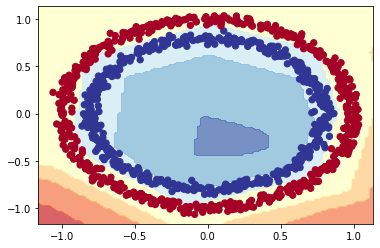

In [38]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# time to replicate the multi-layer neural network from TensorFlow playgroup
tf.random.set_seed=42

#Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1)
])
#Compile the model
model_6.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history = model_6.fit(X, y, epochs=250)